# Generate your hypothesis on what impact independent features have on the target variable and back that up with insights from the data and highlight major differences from suggested impact in Milestone 1.



In [1]:
# Import neccessary Libraries

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset

train=pd.read_excel("Consumer creditworthiness train data.xlsx")


In [3]:
train.shape

(521, 13)

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

# Observations from the given data

1. There are 13 columns and 521 rows
2. The target variable is Loan_Status
3. The independent features are 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed',   'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'.
4. float dtypes are :CoapplicantIncome,Loan_Amount_Term,Credit_History
5. Int dtypes are : Loan_ID,ApplicantIncome ,LoanAmount
6. Object dtypes are : 'Gender', 'Married', 'Dependents', 'Education','Self_Employed,'Property_Area', 'Loan_Status'
7. Target variable is object dtype
8. Null values are there : credit history has the maximum(43) , then self employed(27) ,Loan_Amount_Term(14),Dependents(13),Gender(10)

       



In [8]:
train.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,521.000000,511,518,508.0,521,494,5.210000e+02,5.210000e+02,5.210000e+02,507.000000,478.000000,521,521
unique,NaN,2,2,4.0,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,Male,Yes,0.0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,NaN,415,335,299.0,408,427,NaN,NaN,NaN,NaN,NaN,197,358
mean,547517.817658,NaN,NaN,NaN,NaN,NaN,1.229406e+06,3.495994e+05,2.797044e+05,343.266272,0.847280,NaN,NaN
std,261344.261339,NaN,NaN,NaN,NaN,NaN,1.449755e+06,4.824296e+05,1.712505e+05,63.607974,0.360094,NaN,NaN
min,101559.000000,NaN,NaN,NaN,NaN,NaN,3.375000e+04,0.000000e+00,0.000000e+00,12.000000,0.000000,NaN,NaN
25%,314492.000000,NaN,NaN,NaN,NaN,NaN,6.468750e+05,0.000000e+00,1.960000e+05,360.000000,1.000000,NaN,NaN
50%,543412.000000,NaN,NaN,NaN,NaN,NaN,8.581500e+05,2.812500e+05,2.500000e+05,360.000000,1.000000,NaN,NaN
75%,783776.000000,NaN,NaN,NaN,NaN,NaN,1.292850e+06,5.179500e+05,3.200000e+05,360.000000,1.000000,NaN,NaN


# Observations

1. Gender,Married,Education,Self_Employed,ApplicantIncome,Loan_Status have 2 unique elements.
2. Property_Area has 3 unique elements,Dependents has 4 unique elements.
3. Minimum value in coapplicantIncome and LoanAmount is zero
4. 25% value in coapplicantincome is zero
5. Loan amount term maximum is 480 and minimum is 12
6. Loan amount,Applicant Income and coapplicant income would have outliers as maximum is  too higher than 75%
7. Credit history values are between 0 and 1.
8. Loan amount,applicantincome and coapplicant income may have ouliers.

# Observations from Milestone 1:

1. 'Loan_ID', 'Gender', 'Married','Education' have lesser impact on target variable 'Loan_Status'
2. 'Dependents','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',Loan_Amount_Term', 'Credit_History', 'Property_Area' have higher impact on target variable.



# Concepts which can be used for significance analysis

1. T-test - If population sd is not given and number of samples less than 30
2. Z-test - if population sd is given and number of samples greater than 30
3. ANOVA - if morethan 2 categorical variables are there to consider.
4. Chisquare - if 2 categorical variables are there


In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
train.Loan_Amount_Term.value_counts()

360.0    432
180.0     36
480.0     14
300.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

# To check whether gender affect loan status

In [11]:


train.groupby("Loan_Status")["Gender"].value_counts(normalize=True)

Loan_Status  Gender
N            Male      0.798742
             Female    0.201258
Y            Male      0.818182
             Female    0.181818
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Loan_Status,Gender'>

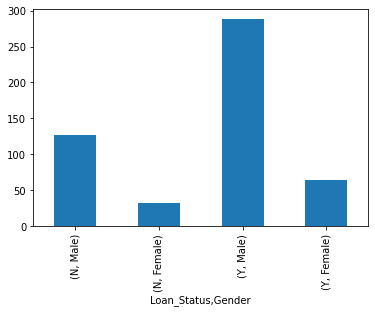

In [12]:
# To plot it

train.groupby("Loan_Status")["Gender"].value_counts().plot(kind="bar")



## Observation
    As both Gender and Loan_status are categorical ,we can use chisquare test for further analysis
 

In [13]:
contingency_table = pd.crosstab(train['Gender'], train['Loan_Status'])
print(contingency_table)

Loan_Status    N    Y
Gender               
Female        32   64
Male         127  288


In [14]:
### Chisquare Test
####Null hypothesis is the gender and Loan status are independent and Alternate hypothesis is gender and Loan status are dependent.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train['Gender'], train['Loan_Status'])
chi,Pval,dof,exp = chi2_contingency(contingency_table)
significance=0.05
print('p-value = ', Pval)
print('Degrees of freedom = ', dof)
print('Chi-square statistic = ', chi)
print('Expected frequencies:\n', exp)
if Pval <significance:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value =  0.6902367665572007
Degrees of freedom =  1
Chi-square statistic =  0.15882917019977388
Expected frequencies:
 [[ 29.87084149  66.12915851]
 [129.12915851 285.87084149]]
Fail to reject null hypothesis


## Observation


1. Here significance value is taken as 0.05, and P-value we got is 0.69 which is greater than significance value,hence gender and loan status are independent features.


## To check whether Married affect loan status

In [15]:


train.groupby("Loan_Status")["Married"].value_counts(normalize=True)

Loan_Status  Married
N            Yes        0.582822
             No         0.417178
Y            Yes        0.676056
             No         0.323944
Name: Married, dtype: float64

<AxesSubplot:xlabel='Loan_Status,Married'>

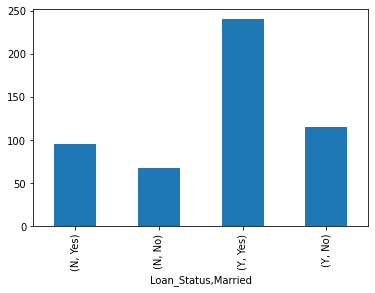

In [16]:
# To plot it

train.groupby("Loan_Status")["Married"].value_counts().plot(kind="bar")



In [17]:
contingency_table = pd.crosstab(train['Married'], train['Loan_Status'])
print(contingency_table)

Loan_Status   N    Y
Married             
No           68  115
Yes          95  240


In [18]:
### Chisquare Test
####Null hypothesis is the gender and Loan status are independent and Alternate hypothesis is gender and Loan status are dependent.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train['Married'], train['Loan_Status'])
chi,Pval,dof,exp = chi2_contingency(contingency_table)
significance=0.05
print('p-value = ', Pval)
print('Degrees of freedom = ', dof)
print('Chi-square statistic = ', chi)
print('Expected frequencies:\n', exp)
if Pval <significance:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value =  0.04969152864604629
Degrees of freedom =  1
Chi-square statistic =  3.851837310804866
Expected frequencies:
 [[ 57.58494208 125.41505792]
 [105.41505792 229.58494208]]
Reject null hypothesis


## Observation


1. Here significance value is taken as 0.05, and P-value we got is 0.049 which is less than significance value,hence Married and loan status are dependent features.


## To check whether Education affect loan status

In [19]:


train.groupby("Loan_Status")["Education"].value_counts(normalize=True)

Loan_Status  Education   
N            Graduate        0.717791
             Not Graduate    0.282209
Y            Graduate        0.812849
             Not Graduate    0.187151
Name: Education, dtype: float64

<AxesSubplot:xlabel='Loan_Status,Education'>

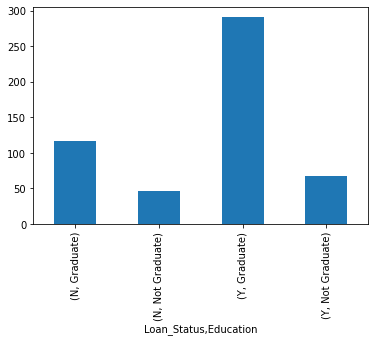

In [20]:
# To plot it

train.groupby("Loan_Status")["Education"].value_counts().plot(kind="bar")

In [21]:
contingency_table = pd.crosstab(train['Education'], train['Loan_Status'])
print(contingency_table)

Loan_Status     N    Y
Education             
Graduate      117  291
Not Graduate   46   67


In [22]:
### Chisquare Test
####Null hypothesis is the gender and Loan status are independent and Alternate hypothesis is gender and Loan status are dependent.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train['Education'], train['Loan_Status'])
chi,Pval,dof,exp = chi2_contingency(contingency_table)
significance=0.05
print('p-value = ', Pval)
print('Degrees of freedom = ', dof)
print('Chi-square statistic = ', chi)
print('Expected frequencies:\n', exp)
if Pval <significance:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value =  0.019997766888094164
Degrees of freedom =  1
Chi-square statistic =  5.412089360791851
Expected frequencies:
 [[127.64683301 280.35316699]
 [ 35.35316699  77.64683301]]
Reject null hypothesis


## Observation


1. Here significance value is taken as 0.05, and P-value we got is 0.049 which is less than significance value,hence Married and loan status are dependent features.


## To check whether Self_Employed affect loan status

In [23]:


train.groupby("Loan_Status")["Self_Employed"].value_counts(normalize=True)

Loan_Status  Self_Employed
N            No               0.864516
             Yes              0.135484
Y            No               0.864307
             Yes              0.135693
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Loan_Status,Self_Employed'>

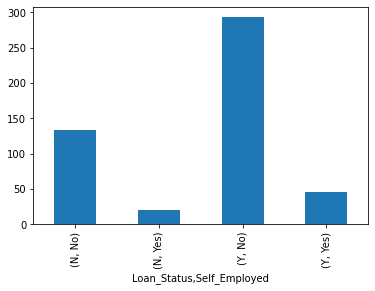

In [24]:
# To plot it

train.groupby("Loan_Status")["Self_Employed"].value_counts().plot(kind="bar")

In [25]:
contingency_table = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
print(contingency_table)

Loan_Status      N    Y
Self_Employed          
No             134  293
Yes             21   46


In [26]:
### Chisquare Test
####Null hypothesis is the gender and Loan status are independent and Alternate hypothesis is gender and Loan status are dependent.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
chi,Pval,dof,exp = chi2_contingency(contingency_table)
significance=0.05
print('p-value = ', Pval)
print('Degrees of freedom = ', dof)
print('Chi-square statistic = ', chi)
print('Expected frequencies:\n', exp)
if Pval <significance:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value =  1.0
Degrees of freedom =  1
Chi-square statistic =  0.0
Expected frequencies:
 [[133.97773279 293.02226721]
 [ 21.02226721  45.97773279]]
Fail to reject null hypothesis


## Observation


1. Here significance value is taken as 0.05, and P-value we got is 0.049 which is less than significance value,hence Married and loan status are dependent features.


## To check whether Property_Area affect loan status

<AxesSubplot:ylabel='Density'>

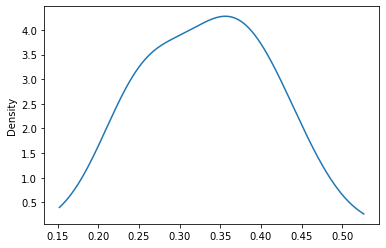

In [27]:
train.groupby("Loan_Status")["Property_Area"].value_counts(normalize=True).plot(kind="kde")

In [28]:
train.Property_Area.value_counts()

Semiurban    197
Urban        176
Rural        148
Name: Property_Area, dtype: int64

In [29]:
group1=train[train["Property_Area"]=="Semiurban"]
group2=train[train["Property_Area"]=="Urban"]
group3=train[train["Property_Area"]=="Rural"]

train.groupby("Loan_Status")["Property_Area"].describe()

,count,unique,top,freq
Loan_Status,,,,
N,163,3,Urban,61
Y,358,3,Semiurban,155


### Applicant income vs Loan Status

In [30]:
## Applicant income vs Loan Status

train.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    1.277224e+06
Y    1.207635e+06
Name: ApplicantIncome, dtype: float64

## Observation
1. both loan rejection and loan approval have somewhat same mean
2. rejection mean is greater than approval mean
3. As the mean value are close to each other null hypothesis would hold

<function matplotlib.pyplot.legend(*args, **kwargs)>

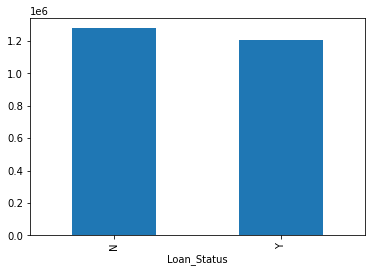

In [31]:
## Applicant income vs Loan Status

train.groupby("Loan_Status")["ApplicantIncome"].mean().plot(kind="bar")
plt.legend

E:\New folder (3)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

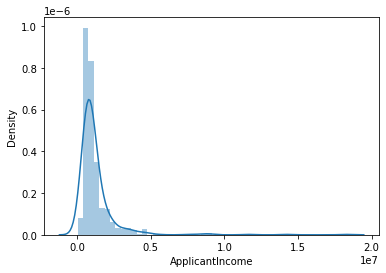

In [32]:
sbn.distplot(train["ApplicantIncome"])

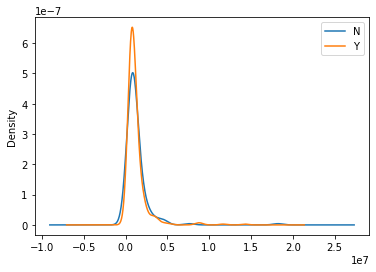

In [33]:
train.groupby("Loan_Status")["ApplicantIncome"].plot(kind="kde")
plt.legend()

### Observation

Applicant income is not a deciding factor as both are completely overlapping and they are counter intuitive

## CoApplicant income vs Loan Status

In [34]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
train.groupby("Loan_Status")["CoapplicantIncome"].mean()

Loan_Status
N    353713.803681
Y    347726.136864
Name: CoapplicantIncome, dtype: float64

## Observation
1. both loan rejection and loan approval have somewhat same mean
2. rejection mean is greater than approval mean
3. As the mean value are close to each other null hypothesis would hold

<function matplotlib.pyplot.legend(*args, **kwargs)>

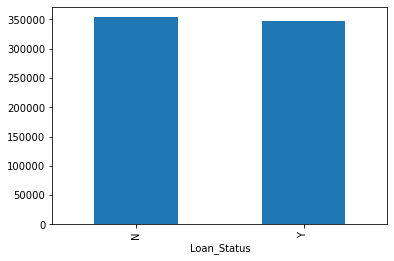

In [36]:
train.groupby("Loan_Status")["CoapplicantIncome"].mean().plot(kind="bar")
plt.legend

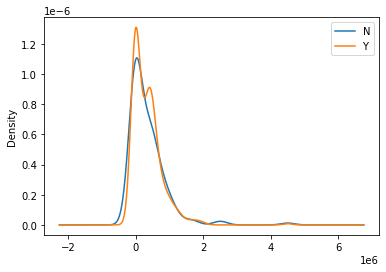

In [37]:
train.groupby("Loan_Status")["CoapplicantIncome"].plot(kind="kde")
plt.legend()

## Observation
CoapplicantIncome is not a deciding factor as both are completely overlapping and they are counter intuitive

## LoanAmount income vs Loan Status

In [38]:
train.groupby("Loan_Status")["LoanAmount"].mean()

Loan_Status
N    291214.723926
Y    274463.687151
Name: LoanAmount, dtype: float64

<function matplotlib.pyplot.legend(*args, **kwargs)>

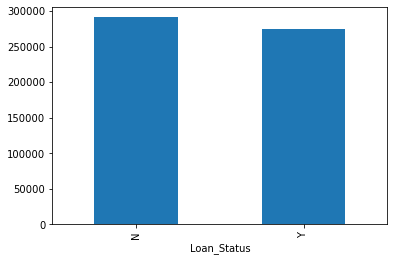

In [39]:
train.groupby("Loan_Status")["LoanAmount"].mean().plot(kind="bar")
plt.legend

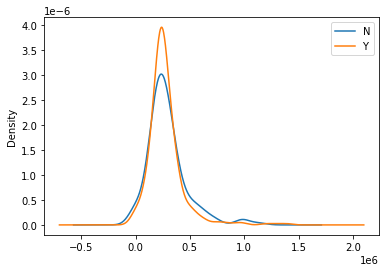

In [40]:
train.groupby("Loan_Status")["LoanAmount"].plot(kind="kde")
plt.legend()

## Observation
LoanAmount is not a deciding factor as both are completely overlapping and they are counter intuitive

In [41]:
 train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


## Feature Engineering

### Creating new features

In [42]:
train["Family_income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [43]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Family_income'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status'>

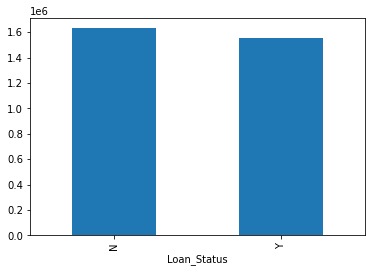

In [44]:
train.groupby("Loan_Status")["Family_income"].mean().plot(kind="bar")

In [45]:
train.loc[train['CoapplicantIncome']==0].shape[0]/train.shape[0]

0.44145873320537427

In [46]:
train["Family_income"].describe()

count    5.210000e+02
mean     1.579006e+06
std      1.474995e+06
min      3.244500e+05
25%      9.373500e+05
50%      1.199925e+06
75%      1.696950e+06
max      1.822500e+07
Name: Family_income, dtype: float64

In [47]:
train["Loan_by_income"]=train["LoanAmount"]*10000/train["Family_income"]

In [48]:
train["Loan_by_income"].describe()

count     521.000000
mean     2030.002145
std       818.401952
min         0.000000
25%      1615.060439
50%      2106.104412
75%      2472.778363
max      7352.146178
Name: Loan_by_income, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

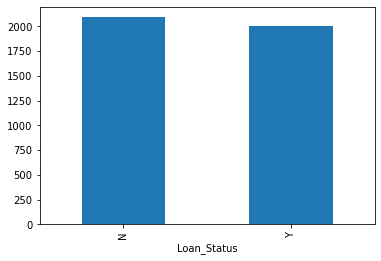

In [49]:
train.groupby("Loan_Status")["Loan_by_income"].mean().plot(kind="bar")

In [50]:
## Binning

In [52]:
train["Family_income"].head(10)

0    1316025.0
1    1370475.0
2     675000.0
3    1111725.0
4    1350000.0
5    2162925.0
6     866025.0
7    1246500.0
8    1244700.0
9    5357025.0
Name: Family_income, dtype: float64

In [53]:
bins=[0,500000,1000000,2000000,4000000,8000000]
group=['Very Low',"Low","Medium","High","Very_High"]
train["Income_bin"]=pd.cut(train["Family_income"],bins,labels=group)
train[["Family_income","Income_bin"]].head(10)

,Family_income,Income_bin
0,1316025.0,Medium
1,1370475.0,Medium
2,675000.0,Low
3,1111725.0,Medium
4,1350000.0,Medium
5,2162925.0,High
6,866025.0,Low
7,1246500.0,Medium
8,1244700.0,Medium
9,5357025.0,Very_High


<AxesSubplot:xlabel='Income_bin'>

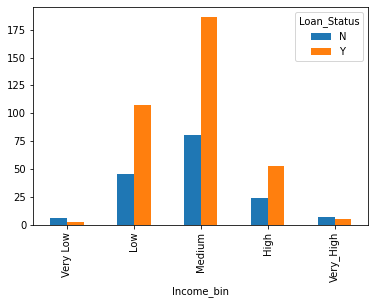

In [54]:
pd.crosstab(train['Income_bin'],train["Loan_Status"],normalize=False).plot(kind="bar")

Percentage          
Loan_Status          N         Y
Income_bin                      
Very Low      0.750000  0.250000
Low           0.296053  0.703947
Medium        0.300752  0.699248
High          0.311688  0.688312
Very_High     0.583333  0.416667

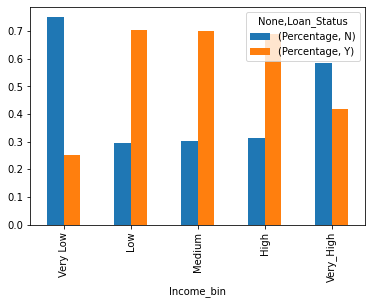

In [55]:
temp=train.groupby("Income_bin")["Loan_Status"].value_counts(normalize=True)
temp=pd.DataFrame(temp)
temp.rename(columns={"Loan_Status":"Percentage"},inplace=True)
temp=temp.reset_index(level=[0,1])
temp=temp.pivot(columns=["Loan_Status"],index="Income_bin")
temp.plot(kind='bar')
temp.head()